In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from spotlob.tests.image_generation import binary_line

In [3]:
from spotlob.calculation import points_within_contours

In [11]:
im,w = binary_line((20,30), (25,50), 8, shape=(50,50))

_, contours, _ = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pts = points_within_contours(contours)

In [12]:
im_J, im_I = np.indices(im.shape)
im_mask = im.astype(bool)
original_pts = np.vstack([im_I[im_mask], im_J[im_mask]]).T

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


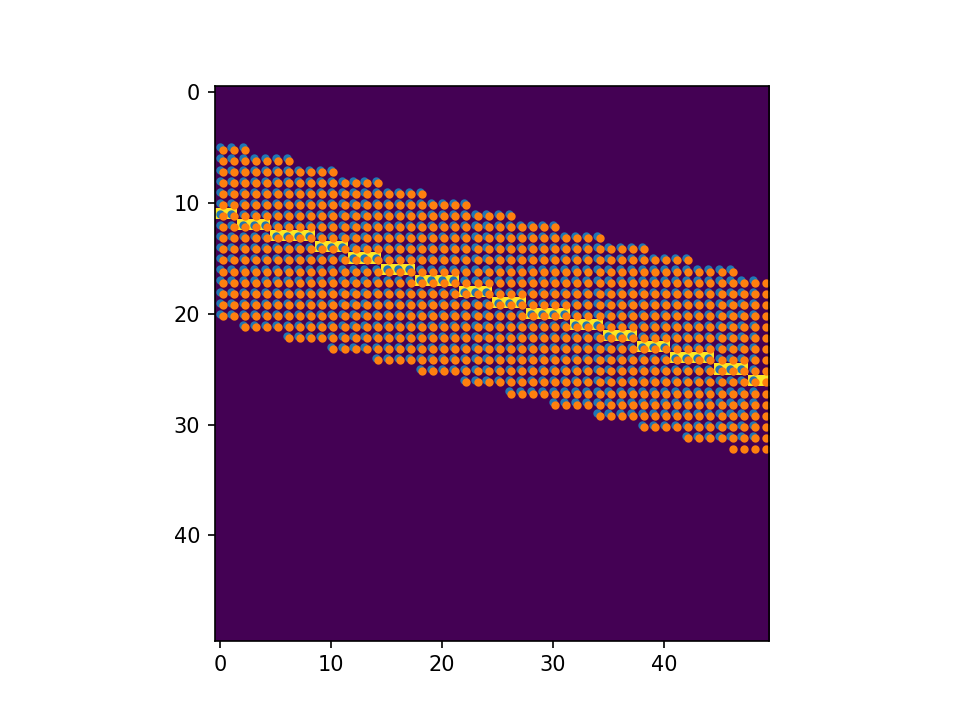

In [14]:
plt.imshow(im)
plt.plot(pts[:,0],pts[:,1], linestyle="", marker=".")
plt.plot(original_pts[:,0]+0.2,original_pts[:,1]+0.2, linestyle="", marker=".")

In [17]:
im2 = np.zeros(im.shape)
[vx,vy,x,y] = cv2.fitLine(pts,cv2.DIST_L12,0,0.01,0.01)

# Now find two extreme points on the line to draw line
lefty = int((-x*vy/vx) + y)
righty = int(((im.shape[1]-x)*vy/vx)+y)

#Finally draw the line
cv2.line(im2,(im.shape[1]-1,righty),(0,lefty),255,1)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
plt.imshow(im2)

In [19]:
vx,vy,x,y

(array([ 0.96040732], dtype=float32),
 array([ 0.27859959], dtype=float32),
 array([ 23.95865822], dtype=float32),
 array([ 18.4667511], dtype=float32))